In [1]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
#loading the dataset
baseball = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# EDA

In [3]:
#shape of the dataset
baseball.shape

(30, 17)

In [4]:
#information of the dataset
baseball.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
#checking for null values exit
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#### their no null values and dtype of data is appropriate.so,we go for next step visualization 

# Descriptive Statistics

In [6]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# understand the terminology represented in the data set
#### R: Runs, AB: At Bats, H: Hits, 2B: Doubles,
#### 3B: Triples, HR: Homeruns, BB: Walks, SO: Strikeouts,
#### SB: Stolen Bases, RA: Runs Allowed, ER: Earned Runs,
#### ERA: Earned Run Average (ERA), CG: Shutouts, SVO: Save opportunity, SV: Saves,
#### SV: Complete Games, E: Errors, W: Win

# Visualization

<AxesSubplot:xlabel='R', ylabel='W'>

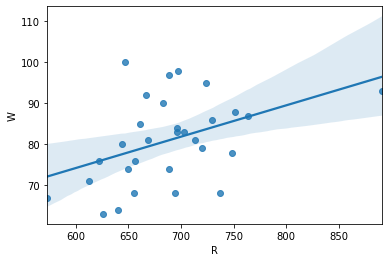

In [7]:
# R-Runs' vs 'W-wins' 
sns.regplot(x='R',y='W',data=baseball)

#### 'R-Runs' has linearly correlated with 'W- wins' 

<AxesSubplot:xlabel='AB', ylabel='W'>

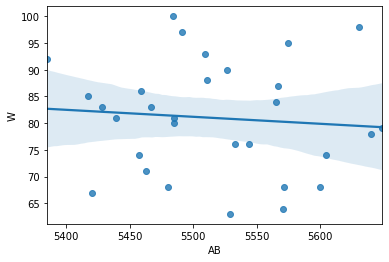

In [8]:
#'At balls ' vs ' Wins'
sns.regplot(x='AB',y='W',data=baseball)

#### 'AB - At Balls' has nagetively correlated with 'W-wins'

<AxesSubplot:xlabel='H', ylabel='W'>

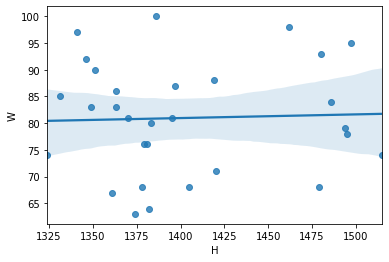

In [9]:
#'H-hits' vs ' W-wins'
sns.regplot(x='H',y='W',data=baseball)

#### Hits are also very weakly correlated  with wins

<AxesSubplot:xlabel='2B', ylabel='W'>

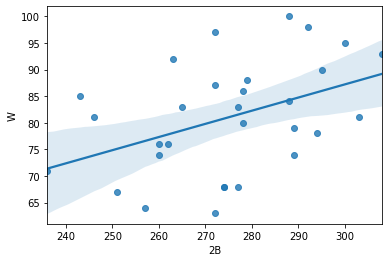

In [10]:
# '2B: Doubles' vs 'W-wins'
sns.regplot(x='2B',y='W',data=baseball)

#### 'Double ' Vs 'Wins' are linear correlated 

<AxesSubplot:xlabel='3B', ylabel='W'>

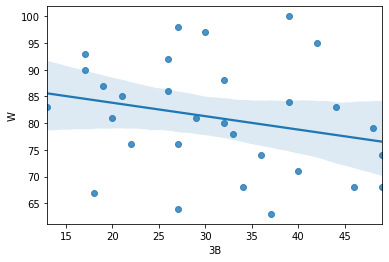

In [11]:
# '3B: Triples' Vs 'Wins'
sns.regplot(x='3B',y='W',data=baseball)

#### 3B-triples and wins are very weak nagitively correlated

<AxesSubplot:xlabel='HR', ylabel='W'>

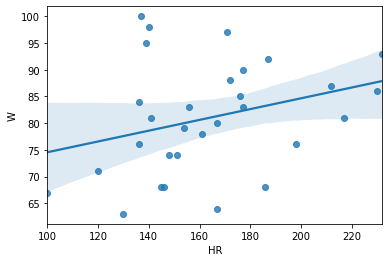

In [12]:
# 'HR: Homeruns'  Vs 'W-Wins'
sns.regplot(x='HR',y='W',data=baseball)

#### 'HR: Homeruns'  Vs 'W-Wins' has very weakly correlation 

<AxesSubplot:xlabel='BB', ylabel='W'>

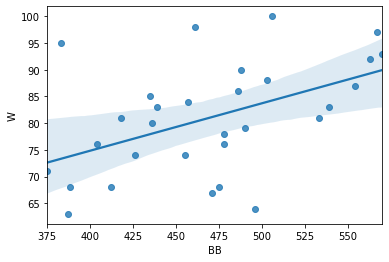

In [13]:
# 'BB: Walks' Vs 'wins'
sns.regplot(x='BB',y='W',data=baseball)

####  Here 'BB: Walks' and 'W:wins ' are linearly correlated 

<AxesSubplot:xlabel='SO', ylabel='W'>

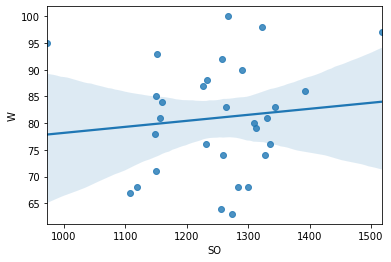

In [14]:
# 'SO: Strikeouts'  Vs 'W:wins'
sns.regplot(x='SO',y='W',data=baseball)

#### Here 'SO:Strike outs' and 'W:wins ' are correlated 

<AxesSubplot:xlabel='SB', ylabel='W'>

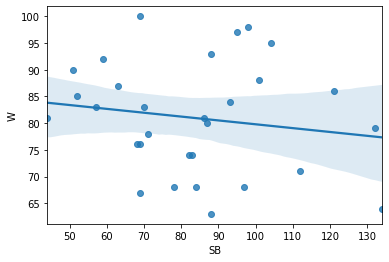

In [15]:
#'SB: Stolen Bases' Vs 'W:wins'
sns.regplot(x='SB',y='W',data=baseball)

#### 'SB: stoeln Bases' and 'W:wins' are nagitively correlated

<AxesSubplot:xlabel='RA', ylabel='W'>

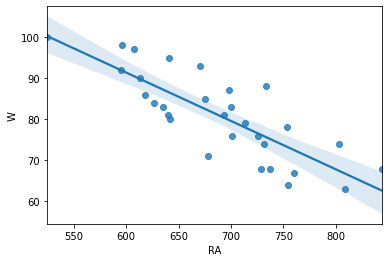

In [16]:
# 'RA: Runs Allowed' Vs 'W:wins'
sns.regplot(x='RA',y='W',data=baseball)

#### 'RA :Runs allowed ' and 'W:wins' are highly nagetively correlated 

<AxesSubplot:xlabel='ER', ylabel='W'>

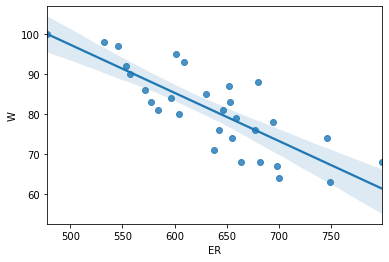

In [17]:
#'ER: Earned Runs' Vs 'W:Wins'
sns.regplot(x='ER',y='W',data=baseball)

#### 'ER :Runs allowed ' and 'W:wins' are highly nagetively correlated 

<AxesSubplot:xlabel='ERA', ylabel='W'>

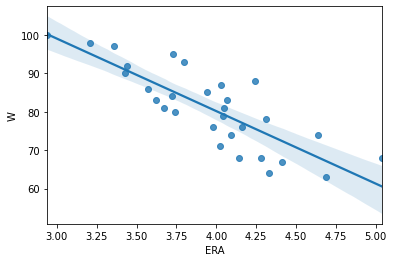

In [18]:
#  ERA: Earned Run Average (ERA) VS Wins
sns.regplot(x='ERA',y='W',data=baseball)

#### 'ERA :Runs allowed ' and 'W:wins' are highly nagetively correlated

<AxesSubplot:xlabel='CG', ylabel='W'>

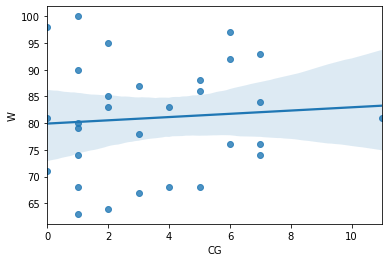

In [19]:
# CG: Shutouts
sns.regplot(x='CG',y='W',data=baseball)

#### CG and W are very weakly correlated 

<AxesSubplot:xlabel='SHO', ylabel='W'>

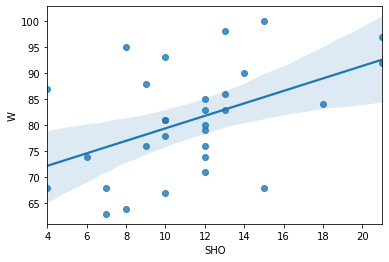

In [20]:
# 'SVO': Save opportunity Vs 'W'
sns.regplot(x='SHO',y='W',data=baseball)

#### SVO and W are  highly postively correlated 

<AxesSubplot:xlabel='SV', ylabel='W'>

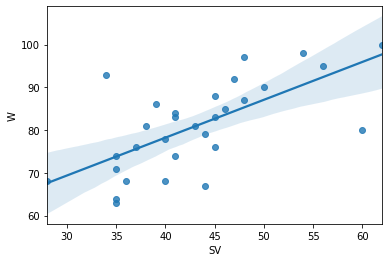

In [21]:
# SV: Saves VS Wins
sns.regplot(x='SV',y='W',data=baseball)

#### 'SV' and 'W' are highly correlated  

<AxesSubplot:xlabel='E', ylabel='W'>

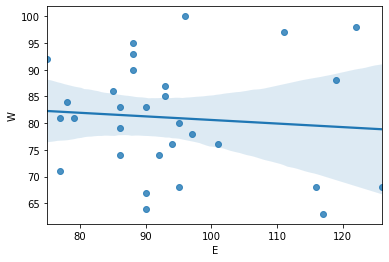

In [22]:
#  E: Errors
sns.regplot(x='E',y='W',data=baseball)

#### 'E' and 'W' also nagetively correlated

# Data correlation

In [23]:
#check the correlation values
baseball.corr()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


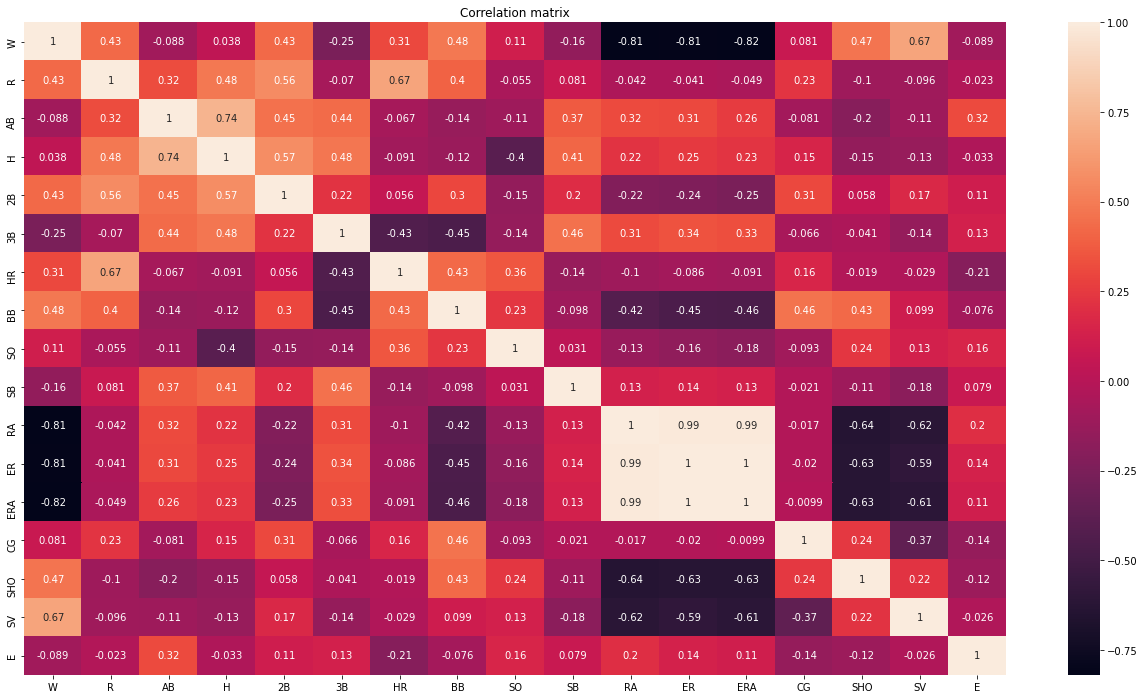

In [24]:
#visualizing the correlation using heatmap
plt.figure(figsize=[22,12])
sns.heatmap(baseball.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

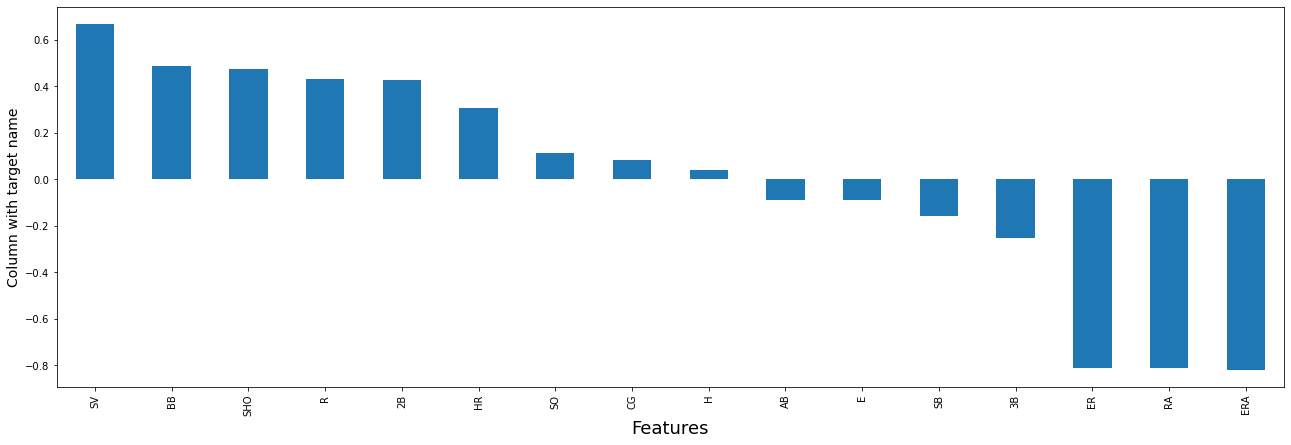

In [25]:
#checking the columns which are +ve and -ve related
plt.figure(figsize=(22,7))
baseball.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar')
plt.xlabel('Features',fontsize=18)
plt.ylabel('Column with target name',fontsize=14)
plt.show()

#### from heat map and bar plot it clearly shows that  'R-Runs','2B','HR','BB',SHO'','SV' are highly positively correlated with wins. 

#### 'H','SO','CG' are very weakly correlated with wins

#### 'AB','3B','SB','RA','ER','ERA','E' are highly nagetively correlated with 'wins'.

# Normalization

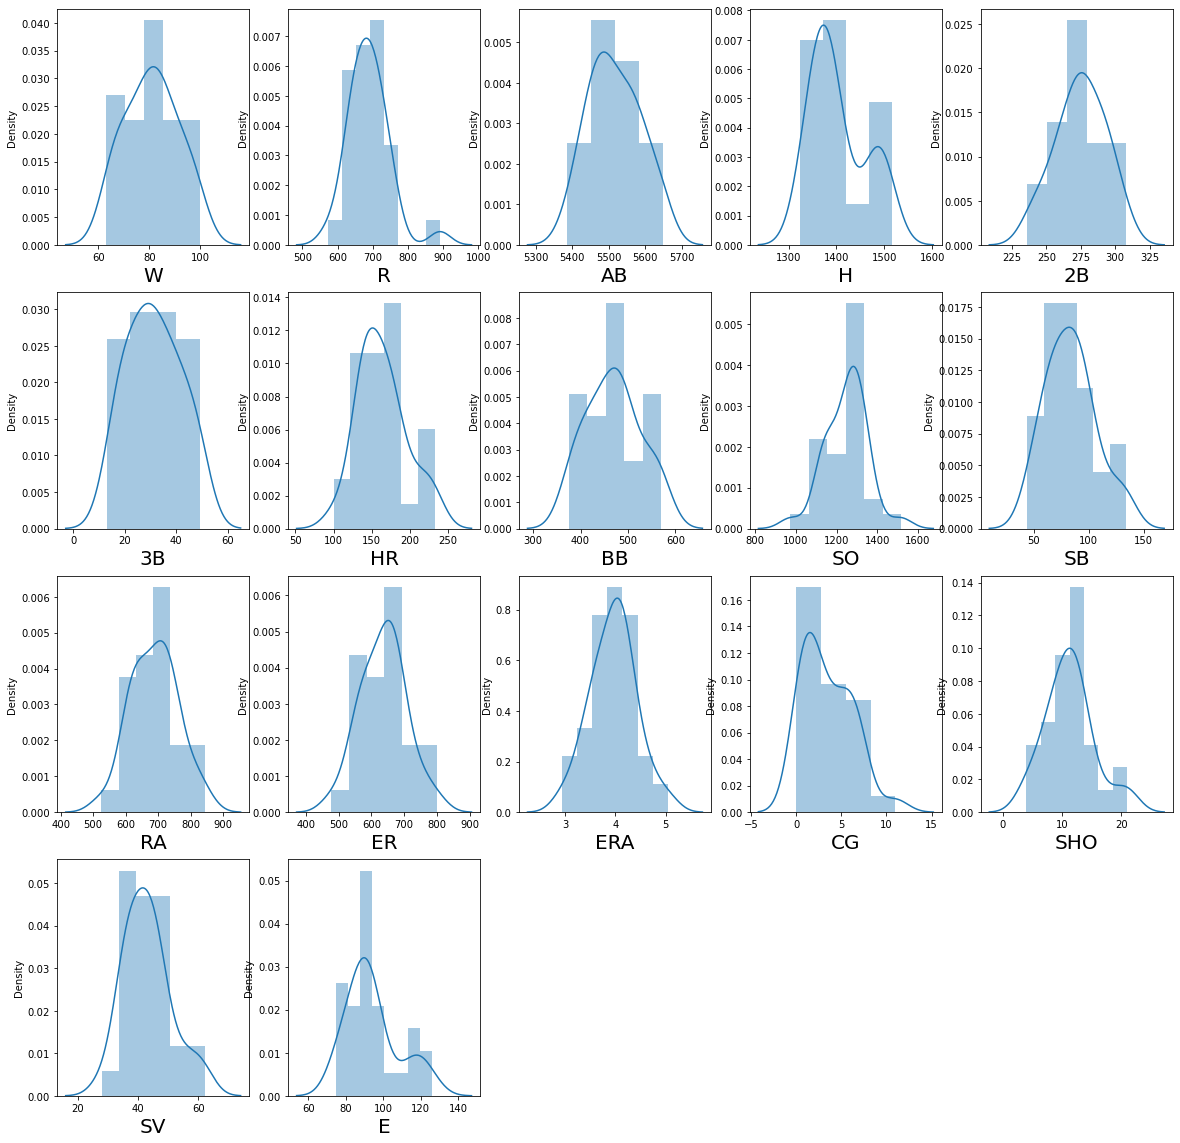

In [26]:
#visualizing data distribution
plt.figure(figsize=(20,20))
plotnumber= 1

for column in baseball:
    if plotnumber <=17:
        ax= plt.subplot(4,5,plotnumber)
        sns.distplot(baseball[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [27]:
#dividing target and featur variables
x=baseball.drop(columns=['W'],axis=1)
y=baseball['W']

In [28]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [29]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [30]:
#reducing skewness
#scaler = PowerTransformer()
for i in x:
    x[i] = np.log(x[i])
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.584791,8.626048,7.311218,5.703782,3.737670,4.934474,5.948035,6.880384,4.644391,6.463029,6.398595,1.316408,0.693147,2.079442,4.025352,4.477337
1,6.545350,8.606485,7.207119,5.624018,3.784190,5.049856,6.084499,7.142037,4.248495,6.551080,6.481577,1.403643,0.693147,2.484907,3.806662,4.454347
2,6.505784,8.601350,7.240650,5.713733,3.367296,4.948760,6.278521,7.053586,4.454347,6.461468,6.369901,1.300192,2.397895,2.302585,3.637586,4.369448
3,6.432940,8.618485,7.230563,5.560682,3.295837,4.912655,6.001415,7.115582,4.219508,6.552508,6.466145,1.381282,1.945910,2.197225,3.610918,4.615121
4,6.535241,8.631414,7.323171,5.666427,3.891820,5.017280,6.120297,7.138073,4.418841,6.688355,6.614726,1.534714,1.945910,2.484907,3.555348,4.454347
5,6.792344,8.614138,7.299797,5.730100,2.833213,5.446737,6.345636,7.048386,4.477337,6.507278,6.411818,1.335001,1.945910,2.302585,3.526361,4.477337
6,6.638568,8.624612,7.242082,5.605802,2.944439,5.356586,6.317165,7.112327,4.143135,6.548219,6.480045,1.393766,1.098612,1.386294,3.871201,4.532599
7,6.569481,8.609772,7.222566,5.505332,2.995732,5.379897,6.035481,7.193686,3.784190,6.541030,6.470800,1.398717,-inf,2.302585,3.761200,4.343805
8,6.467699,8.609772,7.232010,5.627621,3.465736,5.117994,6.077642,7.177782,4.465908,6.464588,6.403574,1.319086,0.000000,2.484907,4.094345,4.553877
9,6.617403,8.637639,7.309881,5.683580,3.496508,5.081404,6.169611,7.045777,4.262680,6.624065,6.542472,1.460938,1.098612,2.302585,3.688879,4.574711


In [31]:
x.skew()

R      0.744196
AB     0.161058
H      0.628554
2B    -0.375624
3B    -0.441291
HR    -0.013351
BB    -0.051741
SO    -0.540955
SB    -0.168916
RA    -0.242397
ER    -0.279346
ERA   -0.319883
CG          NaN
SHO   -0.721953
SV     0.150582
E      0.630080
dtype: float64

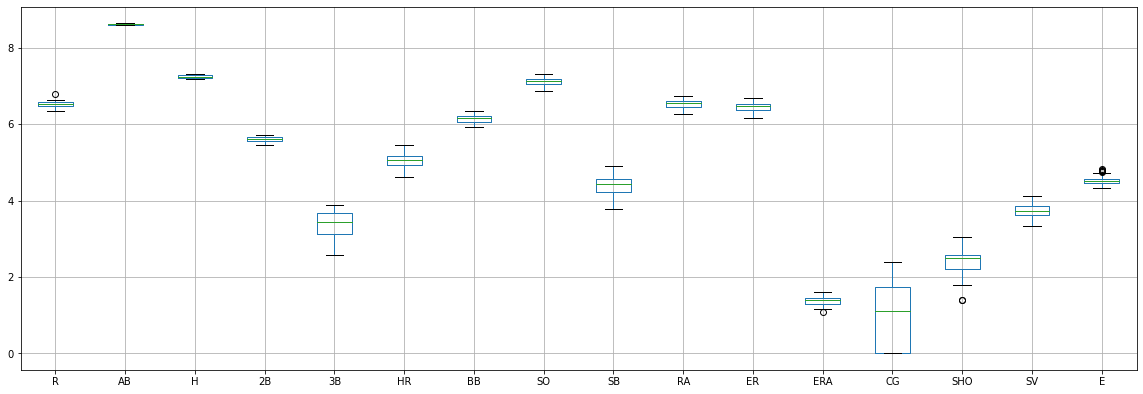

In [32]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()


#### R,ERA,SHO and E has outliers 

In [33]:
x.shape

(30, 16)

In [34]:
q1 = baseball.quantile(0.25)
q3 = baseball.quantile(0.75)
iqr = q3-q1

In [35]:
#validating outlier 'R'
R_h = (q3.R +(1.5*iqr.R))
R_h
print(R_h)
#check the index which have higher value
index = np.where(x['R'] > R_h)
index
print(index)
#drop the index which we found in the abowe cell
x = x.drop(x.index[index])
x.shape

818.75
(array([], dtype=int64),)


(30, 16)

In [36]:
#validating outlier 'SHO'
SHO_h = (q3.SHO +(1.5*iqr.SHO))
SHO_h
print(SHO_h)
#check the index which have higher value
index = np.where(x['SHO'] > SHO_h)
index
print(index)
#drop the index which we found in the abowe cell
x = x.drop(x.index[index])
x.shape

19.0
(array([], dtype=int64),)


(30, 16)

In [37]:
x.shape

(30, 16)

In [38]:
#validating outlier ' E'
E_h = (q3.E +(1.5*iqr.E))
print(E_h)
#check the index which have higher value
index = np.where(x['E'] > E_h)
index
print(index)
#drop the index which we found in the abowe cell
x = x.drop(x.index[index])
x.shape

112.875
(array([], dtype=int64),)


(30, 16)

# Reducing data dimensions


In [39]:
#deleting unused columns or nuetral columns that doesn't effect the wins rates

x =x.drop(columns=['CG','H'])


In [40]:
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,6.584791,8.626048,5.703782,3.737670,4.934474,5.948035,6.880384,4.644391,6.463029,6.398595,1.316408,2.079442,4.025352,4.477337
1,6.545350,8.606485,5.624018,3.784190,5.049856,6.084499,7.142037,4.248495,6.551080,6.481577,1.403643,2.484907,3.806662,4.454347
2,6.505784,8.601350,5.713733,3.367296,4.948760,6.278521,7.053586,4.454347,6.461468,6.369901,1.300192,2.302585,3.637586,4.369448
3,6.432940,8.618485,5.560682,3.295837,4.912655,6.001415,7.115582,4.219508,6.552508,6.466145,1.381282,2.197225,3.610918,4.615121
4,6.535241,8.631414,5.666427,3.891820,5.017280,6.120297,7.138073,4.418841,6.688355,6.614726,1.534714,2.484907,3.555348,4.454347
5,6.792344,8.614138,5.730100,2.833213,5.446737,6.345636,7.048386,4.477337,6.507278,6.411818,1.335001,2.302585,3.526361,4.477337
6,6.638568,8.624612,5.605802,2.944439,5.356586,6.317165,7.112327,4.143135,6.548219,6.480045,1.393766,1.386294,3.871201,4.532599
7,6.569481,8.609772,5.505332,2.995732,5.379897,6.035481,7.193686,3.784190,6.541030,6.470800,1.398717,2.302585,3.761200,4.343805
8,6.467699,8.609772,5.627621,3.465736,5.117994,6.077642,7.177782,4.465908,6.464588,6.403574,1.319086,2.484907,4.094345,4.553877
9,6.617403,8.637639,5.683580,3.496508,5.081404,6.169611,7.045777,4.262680,6.624065,6.542472,1.460938,2.302585,3.688879,4.574711


In [41]:
#data transformation
from sklearn.preprocessing import MinMaxScaler

mms =MinMaxScaler()
x_scaled = mms.fit_transform(x)
x_scaled

array([[0.52984723, 0.72449054, 0.90116232, 0.88382391, 0.39129823,
        0.05041424, 0.        , 0.77241605, 0.42049376, 0.44571116,
        0.44155881, 0.41800473, 0.87196016, 0.30811606],
       [0.44050313, 0.315761  , 0.60159581, 0.91888385, 0.52840204,
        0.3763303 , 0.58829397, 0.41692232, 0.60596   , 0.60723361,
        0.60340544, 0.66252182, 0.59685514, 0.26380266],
       [0.35087844, 0.20847584, 0.93853193, 0.60469067, 0.40827365,
        0.83971034, 0.38942294, 0.60176677, 0.41720516, 0.38985921,
        0.41147221, 0.5525722 , 0.38416175, 0.1001549 ],
       [0.18587101, 0.56648888, 0.36373065, 0.55083542, 0.36537154,
        0.17790068, 0.52881434, 0.39089302, 0.60896692, 0.57719488,
        0.56191875, 0.48903419, 0.35061382, 0.57370078],
       [0.41760543, 0.83662179, 0.76086837, 1.        , 0.48969311,
        0.46182618, 0.57938242, 0.56988361, 0.8951083 , 0.86640328,
        0.84658209, 0.66252182, 0.28070847, 0.26380266],
       [1.        , 0.47566285, 1. 

In [42]:
x_scaled.shape[1]

14

In [43]:
#vif
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns

vif

,vif,feature
0,38.525383,R
1,28.927247,AB
2,18.387228,2B
3,17.120587,3B
4,45.106704,HR
5,10.694506,BB
6,25.258184,SO
7,9.542212,SB
8,1005.192554,RA
9,7246.929905,ER


In [44]:
#ANOVA

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
s = SelectKBest(f_classif, k=14)
s.fit(x,y)
anova=pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)
anova

,0,1
3B,0.759809,0.710195
SHO,0.760512,0.709692
2B,0.921377,0.599799
BB,1.011448,0.544186
HR,1.072928,0.509000
SO,1.536363,0.310912
AB,1.555737,0.304822
SB,1.884263,0.220770
SV,1.933694,0.210759
ER,1.953716,0.206868


# Building model

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [46]:
lr = LinearRegression()

train = []
test = []
    
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
        
    train.append(r2_score(y_train,pred_train))
    test.append(r2_score(y_test,pred_test))

data = pd.DataFrame({'Train':train,
                    'Test':test})
data
    


,Train,Test
0,0.959168,-0.817812
1,0.972463,0.658520
2,0.982466,-1.069615
3,0.960738,0.627931
4,0.938895,0.879020
5,0.947299,0.823832
6,0.962820,0.702310
7,0.972835,-0.015737
8,0.956147,0.824887
9,0.961064,0.631595


In [47]:
#Linear Regression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=14)
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
pred_test = lr.predict(x_test)
print("R2_score:",r2_score(y_test,pred_test)*100)


R2_score: 89.43835077569463


In [49]:
#crossvalidation for model
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score  = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv_score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the Test is {test_accuracy})")
    print("/n")
    

At cross fold 2 the cv_score is -13.979881224660408 and accuracy score for training is -1.198772672569417 and accuracy for the Test is 0.8943835077569463)
/n
At cross fold 3 the cv_score is 0.5485409941299912 and accuracy score for training is -1.198772672569417 and accuracy for the Test is 0.8943835077569463)
/n
At cross fold 4 the cv_score is 0.05874219695650415 and accuracy score for training is -1.198772672569417 and accuracy for the Test is 0.8943835077569463)
/n
At cross fold 5 the cv_score is 0.33510179358230696 and accuracy score for training is -1.198772672569417 and accuracy for the Test is 0.8943835077569463)
/n
At cross fold 6 the cv_score is 0.47699389671294656 and accuracy score for training is -1.198772672569417 and accuracy for the Test is 0.8943835077569463)
/n
At cross fold 7 the cv_score is 0.3526340591593006 and accuracy score for training is -1.198772672569417 and accuracy for the Test is 0.8943835077569463)
/n
At cross fold 8 the cv_score is 0.4402397898802083 and

#### since the no.of folds don't have such impact on the accuracy and cv_score,so,cv=3 is selected.Here,we handle the overfitting And under by checking the training and testing score

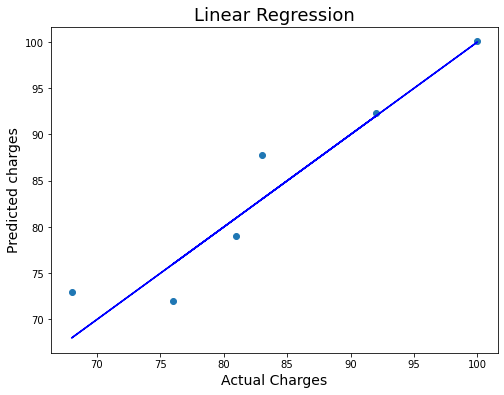

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test)
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [51]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10],
             'random_state':list(range(0,10))}
ls= Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [52]:
ls = Lasso(alpha=1,random_state= 0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predict_ls = ls.predict(x_test)

ls = r2_score(y_test,predict_ls)
ls


0.07486580538045318

# Ensemble Technique 

In [53]:
parameters = {'criterion':['mse','mac'],
             'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [56]:
rf = RandomForestRegressor(criterion = 'mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2score',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=3)
rfc = rfscore.mean()
print('Cross_val_score',rfc)

R2score 48.74357878475796
Cross_val_score 0.3881700098476058


#### we are getting the r2score and crossvalidation score are 49% and 39%. For liner regression also the cross validation score is 39%.so,our model performed well 

In [57]:
import joblib
joblib.dump(lr,"baseball.pkl")

['baseball.pkl']